# check indexing

In [1]:
import json

In [2]:
with open("../dataset_flickr30k.json") as f:
    data = json.load(f)

In [3]:
test_set = []

In [4]:
splits = set()
for im in data['images']:
    splits.add(im['split'])
    if im['split'] == 'test':
        test_set.append(im)

In [5]:
len(test_set)

1000

In [6]:
# test_set[0]

# Use trained models

In [20]:
from caption import caption_image_beam_search, visualize_att
import torch 
import json
import os
from models import Encoder, DecoderWithAttention, Attention

In [8]:
# os.environ['CUDA_VISIBLE_DEVICES'] = '3'
# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [9]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

In [10]:
checkpoint = "./initial_trained/BEST_checkpoint_flickr30k_5_cap_per_img_5_min_word_freq.pth.tar"

word_map = '../../a-PyTorch-Tutorial-to-Image-Captioning/flickr_prep/WORDMAP_flickr30k_5_cap_per_img_5_min_word_freq.json'

In [11]:
checkpoint = torch.load(checkpoint, map_location=str(device))#

In [12]:
decoder = checkpoint['decoder']
decoder = decoder.to(device)
decoder.eval()
encoder = checkpoint['encoder']
encoder = encoder.to(device)
encoder.eval()

# Load word map (word2ix)
with open(word_map, 'r') as j:
    word_map = json.load(j)
rev_word_map = {v: k for k, v in word_map.items()}  # ix2word

In [13]:
# test_set[0]

In [14]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

r = random.randint(0,1000)
print(r)

filename = test_set[r]['filename']
rep_dir = '../../a-PyTorch-Tutorial-to-Image-Captioning/'
img = f'{rep_dir}/flickr30k_images/flickr30k_images/{filename}'
beam_size = 3

595


In [15]:
seq, alphas = caption_image_beam_search(encoder, decoder, img, word_map, beam_size)

In [16]:
# alphas_ar[0,:]

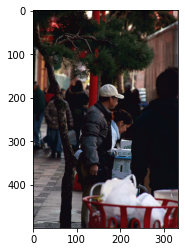

In [17]:
img_val = mpimg.imread(img)
plt.imshow(img_val)

In [18]:
[rev_word_map[i] for  i in seq]

['<start>',
 'a',
 'group',
 'of',
 'people',
 'are',
 'standing',
 'around',
 'a',
 'table',
 '<end>']

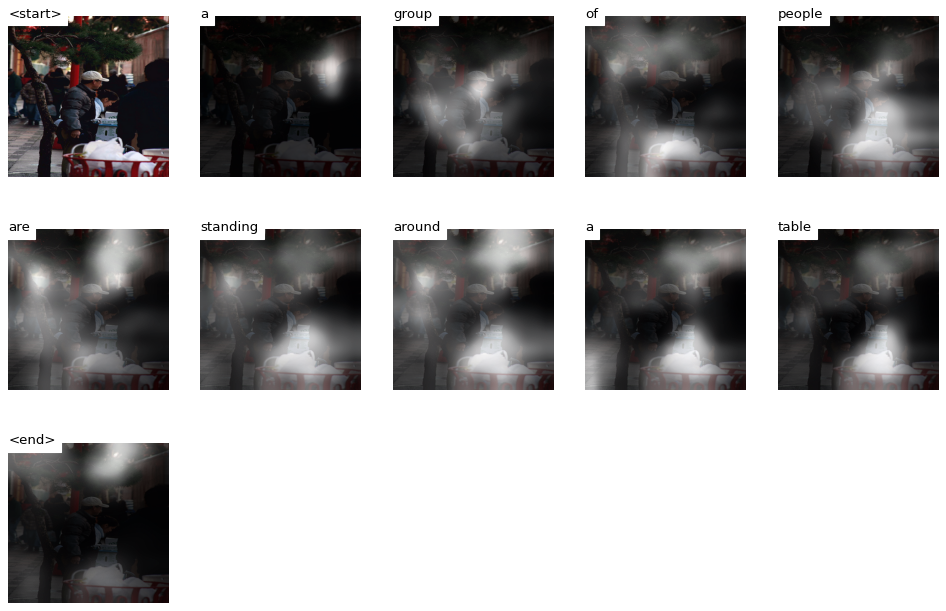

In [21]:
visualize_att(img, seq, np.array(alphas), rev_word_map)